Importing Dependencies

In [362]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

Data Collection and processing

In [363]:
diabetes = pd.read_csv(r'C:\Users\NEW\OneDrive\Desktop\Diabetes Prediction System\diabetes.csv')

In [364]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [365]:
diabetes.shape

(768, 9)

In [366]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [367]:
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [368]:
diabetes.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [369]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [370]:
diabetes.duplicated().sum()

np.int64(0)

In [371]:
diabetes['Insulin'] = np.log1p(diabetes['Insulin'])

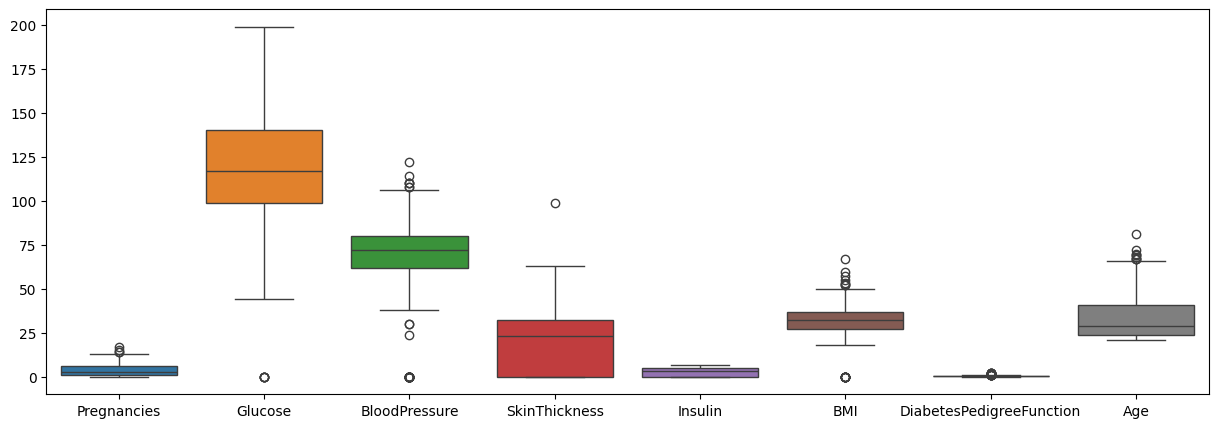

In [372]:
plt.figure(figsize=(15,5))
sns.boxplot(data=diabetes.iloc[:, :-1])  # iloc stands for integer-location based indexing.It lets you select rows and columns by their index numbers, not by names.
plt.show()

In [373]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(diabetes[zero_cols] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [374]:
diabetes[zero_cols] = diabetes[zero_cols].replace(0, np.nan)
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [375]:
# Missing Glucose for Outcome=0 → filled with median glucose of non-diabetics
# Missing Glucose for Outcome=1 → filled with median glucose of diabetics
""" for col in zero_cols:
    diabetes[col] = diabetes.groupby('Outcome')[col].transform(
        lambda x: x.fillna(x.median())
    ) """

" for col in zero_cols:\n    diabetes[col] = diabetes.groupby('Outcome')[col].transform(\n        lambda x: x.fillna(x.median())\n    ) "

In [376]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [377]:
X = diabetes.drop(columns='Outcome', axis=1)
Y = diabetes['Outcome']

In [378]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  SkinThickness   Insulin   BMI  \
0              6    148.0           72.0           35.0       NaN  33.6   
1              1     85.0           66.0           29.0       NaN  26.6   
2              8    183.0           64.0            NaN       NaN  23.3   
3              1     89.0           66.0           23.0  4.553877  28.1   
4              0    137.0           40.0           35.0  5.129899  43.1   
..           ...      ...            ...            ...       ...   ...   
763           10    101.0           76.0           48.0  5.198497  32.9   
764            2    122.0           70.0           27.0       NaN  36.8   
765            5    121.0           72.0           23.0  4.727388  26.2   
766            1    126.0           60.0            NaN       NaN  30.1   
767            1     93.0           70.0           31.0       NaN  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0

Data Standardization

In [379]:
#scaler = StandardScaler()

In [380]:
#scaler.fit(X)

In [381]:
#standadized_data = scaler.transform(X)

In [382]:
#print(standadized_data)

In [383]:
#X = standadized_data
#Y = diabetes['Outcome']

Train Test Split

In [384]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [385]:
medians = X_train.median()

X_train = X_train.fillna(medians)
X_test = X_test.fillna(medians)

In [386]:
X_train.isnull().sum()
X_test.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [387]:
# Scaling
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [ ]:
""" param_grid = {
    'C': [0.5, 1, 2, 5, 10],
    'kernel': ['linear'],
    'class_weight': ['balanced']
} """

In [ ]:
""" svc = svm.SVC()
grid = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='recall', cv=5)
grid.fit(X_train, Y_train) """

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVC()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.5, 1, ...], 'class_weight': ['balanced'], 'kernel': ['linear']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : the 

In [ ]:
""" best_model = grid.best_estimator_
print("Best parameters:", grid.best_params_) """

Best parameters: {'C': 1, 'class_weight': 'balanced', 'kernel': 'linear'}


In [ ]:
""" y_pred = best_model.predict(X_test)
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred)) """

Recall: 0.6666666666666666
F1 Score: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82       100
           1       0.67      0.67      0.67        54

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [ ]:
classifier = svm.SVC(kernel='linear', class_weight='balanced', C=1, probability=True)

In [ ]:
classifier.fit(X_train, Y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",5
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",'balanced'
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


Model Evaluation

In [355]:
# Accuracy score on training data
X_train_pred = classifier.predict(X_train)
training_accuracy = accuracy_score(X_train_pred, Y_train)

In [356]:
print("Training accuracy with SVM: ", f"{round(training_accuracy*100, 2)} %")

Training accuracy with SVM:  76.38 %


In [357]:
# Accuracy score on test data
X_test_pred = classifier.predict(X_test)
test_accuracy = accuracy_score(X_test_pred, Y_test)

In [358]:
print("Test accuracy with SVM: ", f"{round(test_accuracy*100, 2)} %")

Test accuracy with SVM:  76.62 %


In [359]:
recall = recall_score(Y_test, X_test_pred)
print("Recall with SVM: ", recall)

Recall with SVM:  0.6666666666666666


In [360]:
f1 = f1_score(Y_test, X_test_pred)
print("F1 Score:", f1)

F1 Score: 0.6666666666666666


In [317]:
input_data = (4, 110, 92, 0, 0, 37.6, 0.191, 30)
numpy_input = np.asarray(input_data)

numpy_input = numpy_input.reshape(1, -1)
# As we standardized the data, so we have to also transform this data

std_data = scaler.transform(numpy_input)

prediction = classifier.predict(std_data)
#print(prediction)

if prediction[0] == 0:
    print("This person is non diabetic")
else:
    print("This person is diabetic")

This person is non diabetic


c:\Users\NEW\OneDrive\Desktop\Diabetes Prediction System\venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
